In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date

df = pd.read_csv(r"c:\Users\pc\Desktop\Case analysis - LBOBGDT\supermarket_sales FINAL.csv")
pd.option_context('display.max_rows', None, 'display.max_columns', None)  # more options can be specified also

df.columns = df.columns.str.replace(' ','_')#Removed spaces in column names for ease of use
pd.set_option('display.precision', 2) #Rounding off decimals to the tenth position


#Changing date format of dataframe using datetime library
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df['Date'] = df['Date'].dt.strftime('%m')

#Determining seasons of the months in Myanmar
df['Date'] = df['Date'].str.replace('01','Cold') #Jan
df['Date'] = df['Date'].str.replace('02','Cold') #Feb
df['Date'] = df['Date'].str.replace('03','Hot')  #Mar
df['Date'] = df['Date'].str.replace('04','Hot')  #April
df['Date'] = df['Date'].str.replace('05','Hot')  #May
df['Date'] = df['Date'].str.replace('06','Monsoon') #Jun
df['Date'] = df['Date'].str.replace('07','Monsoon') #Jul
df['Date'] = df['Date'].str.replace('08','Monsoon') #Aug
df['Date'] = df['Date'].str.replace('09','Monsoon') #Sep
df['Date'] = df['Date'].str.replace('10','Monsoon') #Oct
df['Date'] = df['Date'].str.replace('11','Cold')  #Nov
df['Date'] = df['Date'].str.replace('12','Cold')  #Dec

df.columns = df.columns.str.replace('Date','Season') #changed the name of 'Date' column to 'Season' 


#Dropping unecessary columns
df = df.drop('Branch', axis=1)
df = df.drop('Customer_type', axis=1)
df = df.drop('Tax_5%', axis=1)
df = df.drop('Time', axis=1)
df = df.drop('Payment', axis=1)
df = df.drop('gross_margin_percentage', axis=1)

df.head(None)

,Invoice_ID,City,Gender,Product_line,Unit_price,Quantity,Total,Season,cogs,gross_income,Rating
0,750-67-8428,Yangon,Female,Health and beauty,74.69,7,548.97,Hot,522.83,26.14,9.1
1,226-31-3081,Naypyitaw,Female,Electronic accessories,15.28,5,80.22,Monsoon,76.40,3.82,9.6
2,631-41-3108,Yangon,Male,Home and lifestyle,46.33,7,340.53,Hot,324.31,16.22,7.4
3,123-19-1176,Yangon,Male,Health and beauty,58.22,8,489.05,Cold,465.76,23.29,8.4
4,373-73-7910,Yangon,Male,Sports and travel,86.31,7,634.38,Monsoon,604.17,30.21,5.3
...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,Naypyitaw,Male,Health and beauty,40.35,1,42.37,Cold,40.35,2.02,6.2
996,303-96-2227,Mandalay,Female,Home and lifestyle,97.38,10,1022.49,Cold,973.80,48.69,4.4
997,727-02-1313,Yangon,Male,Food and beverages,31.84,1,33.43,Monsoon,31.84,1.59,7.7
998,347-56-2442,Yangon,Male,Home and lifestyle,65.82,1,69.11,Cold,65.82,3.29,4.1


In [2]:
df.isnull().sum() #no null values



Invoice_ID      0
City            0
Gender          0
Product_line    0
Unit_price      0
Quantity        0
Total           0
Season          0
cogs            0
gross_income    0
Rating          0
dtype: int64

Quantity
Gender Product_line                    
Female Electronic accessories       488
       Fashion accessories          530
       Food and beverages           514
       Health and beauty            343
       Home and lifestyle           498
       Sports and travel            496
Male   Electronic accessories       483
       Fashion accessories          372
       Food and beverages           438
       Health and beauty            511
       Home and lifestyle           413
       Sports and travel            424

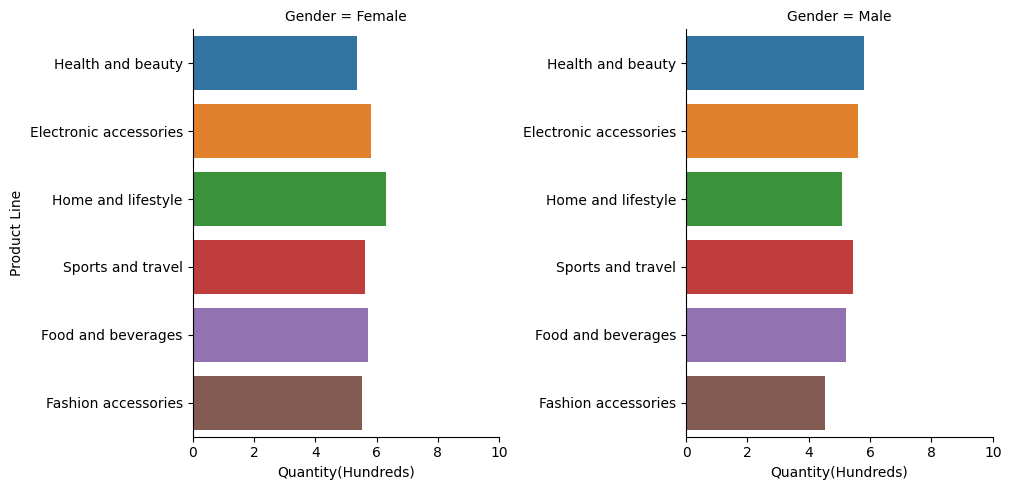

In [3]:
#Question 1
df5 = df.groupby(['Gender','Product_line'],  sort=True).agg({'Quantity' : 'sum'})
display(df5)

g = sns.FacetGrid(df, col='Gender', sharey=False, col_wrap=4, height=5, aspect=1, xlim = (0,10), hue='Product_line')
g.map_dataframe(sns.barplot, x='Quantity', y='Product_line', orient='y', errorbar = None )
g.set_axis_labels('Quantity(Hundreds)', 'Product Line')

Quantity
City      Product_line                    
Mandalay  Electronic accessories       316
          Fashion accessories          297
          Food and beverages           270
          Health and beauty            320
          Home and lifestyle           295
          Sports and travel            322
Naypyitaw Electronic accessories       333
          Fashion accessories          342
          Food and beverages           369
          Health and beauty            277
          Home and lifestyle           245
          Sports and travel            265
Yangon    Electronic accessories       322
          Fashion accessories          263
          Food and beverages           313
          Health and beauty            257
          Home and lifestyle           371
          Sports and travel            333

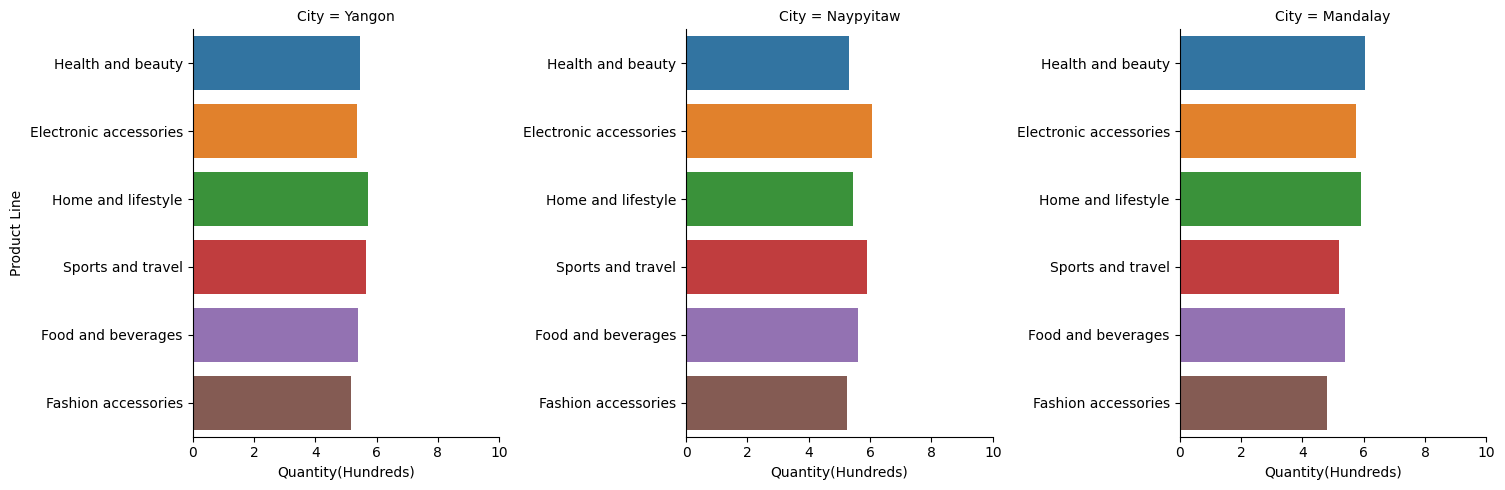

In [4]:
#Question 2 - Which product type should the supermarket chain focus on based on consumer behavior per city and what could be the possible reasons for this?

df4 = df.groupby(['City','Product_line']).agg({'Quantity' : 'sum'})
display(df4)

g = sns.FacetGrid(df, col='City', sharey=False, col_wrap=4, height=5, aspect=1, xlim = (0,10), hue='Product_line')
g.map_dataframe(sns.barplot, x='Quantity', y='Product_line', orient='y', errorbar = None )
g.set_axis_labels('Quantity(Hundreds)', 'Product Line')

Quantity
Season  Product_line                    
Cold    Electronic accessories       550
        Food and beverages           516
        Sports and travel            501
        Fashion accessories          470
        Health and beauty            422
        Home and lifestyle           395
Hot     Home and lifestyle           324
        Health and beauty            314
        Electronic accessories       266
        Food and beverages           255
        Sports and travel            245
        Fashion accessories          219
Monsoon Fashion accessories          213
        Home and lifestyle           192
        Food and beverages           181
        Sports and travel            174
        Electronic accessories       155
        Health and beauty            118

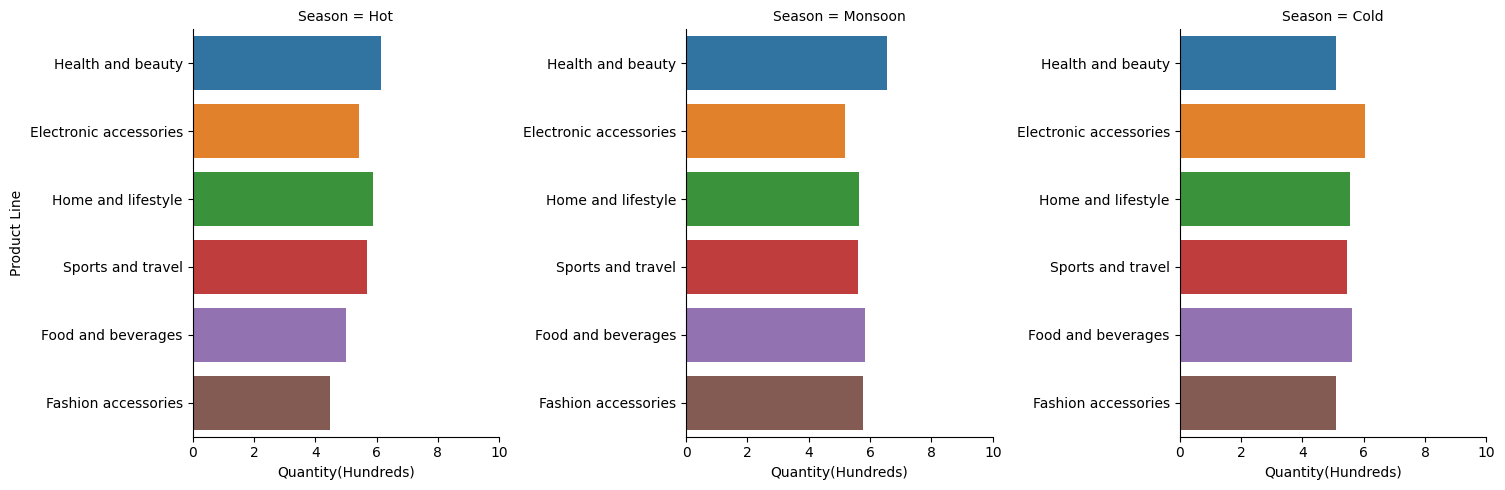

In [5]:
#Question 3 Which product type should the supermarket chain focus on based on consumer behavior throughout the seasons of the year and what could be the possible reasons for this?

df2 = df.groupby(['Season','Product_line']).agg({'Quantity' : 'sum'}).sort_values('Quantity', ascending=False)
display(df2)

g = sns.FacetGrid(df, col='Season', sharey=False, sharex= True, col_wrap=4, height=5, aspect=1, xlim = (0,10), hue='Product_line')
g.map_dataframe(sns.barplot, x='Quantity', y='Product_line', orient='y', errorbar = None )
g.set_axis_labels('Quantity(Hundreds)', 'Product Line')


